# Vibrações Mecânicas
 _Prof. Tito Dias Júnior_

## Exemplo 1: Batimentos

Uma massa sujeita a dois movimentos harmônicos dados por $x_1(t)=A cos \omega t$ e $x_2(t)=A cos (\omega  +\delta)t$, sendo $A=1cm$, $f = 3.2 Hz$ e $f\delta = 0.159 Hz$. Mostre graficamente o movimento da massa em oscilação e identifique a frequência de batimento.

### **Solução**

Como mostrado, o batimento é obtido pela combinação linear de dois movimentos, ou sinais, oscilatórios com frequências próximas de mesma amplitude, ou seja:

$x(t) = x_1(t)+x_2(t)=A[ cos (\omega t) + cos (\omega +\delta)t]$

podendo-se mostrar que

$ x(t) = 2A cos \frac{\delta t}{2} cos \left ( \omega +\frac{\delta}{2} \right )t$

Podemos então obter o gráfico de duas formas, utilizando a primeira equação mostrada, que representa a soma dos movimentos explicitamente, ou a segunda equação. A frequência de batimento poderá ser determinada no gráfico, como o inverso do período das maiores amplitudes.



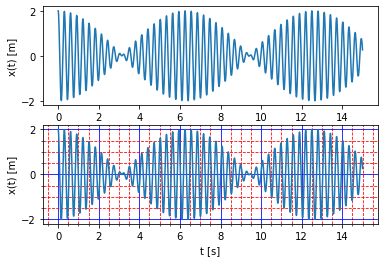

In [102]:
from numpy import *       # Importa o módulo numpy (métodos numéricos)
import matplotlib.pyplot as plt
# variáveis dos enunciado
A = 1
f =  3.2                      # Frequência em Hz
f_delta = 0.159               # Frequência em Hz
w = 2*pi*f
delta = 2*pi*f_delta
dt = 0.001                # Incremento de tempo ou tempo de amostragem
t = arange(0, 15., dt)    # Define um array que inicia em 0 e termina em 15, com incremento de 0.001
# Primeira forma de solução: Criar um vetor para cada sinal (x1 e x2) e somar os dois antes de plotar
x1 = A*cos(w*t)
x2 = A*cos((w+delta)*t)
x12 = x1 + x2 

# Segunda forma de solução
x22 = 2*A* cos(delta*t/2) * cos((w+delta/2)*t)

# Plotando o resultado
plt.figure()         # Define uma figura para plotar
                     # Figura é formada por dois subplots

plt.subplot(211)     # Primeira forma de solução
plt.plot(t,x12)
plt.xlabel('t [s]')
plt.ylabel('x(t) [m]')

plt.subplot(212)     # Segunda forma de solução
plt.plot(t,x22)
plt.xlabel('t [s]')
plt.ylabel('x(t) [m]')
plt.minorticks_on()  # Ativa as menores divisões dos eixos
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')

plt.show()






Do gráfico podemos estimar que o período da onda de batimento é aproximadamente $6.3 s$, assim a frequência do movimento harmônico é $f=\frac{1}{T}=\frac{1}{6.3}=0.159 Hz$, ou em rad/s, $\omega = \frac{2 \pi} {T} = 2 \pi f = 1 rad/s$.

Portanto, a frequência de batimento é 1 rad/s ou 0.159 Hz.

# **Exercício: 1° Check de Verificação - 11/08/2020**
Estime a frequência de batimento em Hz para a composição de dois sinais de mesma amplitude (2cm) com frequência de 10 Hz e delta igual a 1 Hz. Coloque a resposta no AVA, no primeiro check de verificação.

## Exemplo 2: Análise Harmônica

Considerando exemplo anterior, mostre graficamente o espectro de frequências do movimento harmônico com batimento. E determine graficamente as frequências características do movimento.

### **Solução**

As frequências características de um movimento ou sinal temporal podem ser obtidas por meio da transformada de Fourier do sinal. Considerando o sinal calculado no exemplo anterior, podemos obter os coeficientes da transformada de Fourier por meio da sua definição, ou utilizando o algoritmo da transformada rápida de Fourier (_Fast Fourier Transform - FFT_). Para isso, vamos importar o módulo _scipy_ que possui uma função implementada para a FFT.



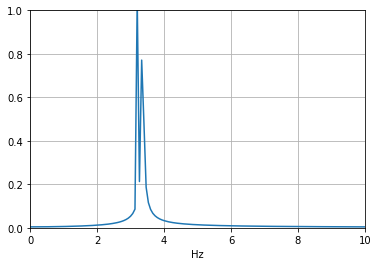

As frequências de pico em Hz são: [3.2        3.33333333]
A frequência de batimento é: 0.1333333333333333


In [103]:
from scipy.fft import fft, fftfreq                 # Importa o módulo scipy.fft para usar a FFT
from scipy.signal import find_peaks                # Importa o módulo scipy.signal para encontrar os picos de frequência

N = len(x12) 
# Determina o tamanho do vetor que contém o sinal de interesse
yf = fft(x12)                                      # Calcula a transformada rápida de Fourier (FFT) para o signal 
xf = fftfreq(N,dt)                                 # Calcula as frequências correspondentes em Hz para a FFT

yf_abs = 2.0/N*abs(yf[0:N//2])                     # Normaliza as ordenadas da FFT

plt.plot(xf[0:N//2], yf_abs)
plt.xlabel('Hz')
plt.axis([0, 10, 0, 1])
plt.grid()
plt.show()

picos, propriedades = find_peaks(yf_abs, height=0.5) # Encontra os índices referentes ao picos de frequências
# No gráfico, observamos dois picos de frequências. A frequência de batimento é a diferença entre as frequências em pico

print('As frequências de pico em Hz são:',xf[picos])
print('A frequência de batimento é:', abs(xf[picos[0]]-xf[picos[1]]))

# **Exercício: 2° Check de Verificação - 11/08/2020**
Estime a frequência de batimento em Hz para a composição de dois sinais de mesma amplitude (2cm) com frequência de 10 Hz e e delta igual 1 Hz. Coloque a resposta no AVA, no segundo check de verificação.

## Referências

Kiusalaas, J. (2013). **Numerical Methods in Engineering With Python 3**. Cambridge: Cambridge.<br>
S. Rao. (2012) **Vibrações Mecânicas**. Prentice Hall, 4.ª ed. 